# Load and render Knowledge Bases
Copyright (c) 2022 Siemens AG Oesterreich
SPDX-License-Identifier: MIT


- How to load a knowledge base from a list of facts with the clorm integration.
- How to render a knowledge based with the clingraph integration

In [1]:
%cd ..

/Users/susana/Documents/Education/PhD/ExternalProjects/OOASP/asp_interactive_configuration


### Knowledge Base

Import the `OOASPKnowledgeBase` classs

In [2]:
from ooasp.kb import OOASPKnowledgeBase

Create an `OOASPKnowledgeBase` from a logic program

#### Racks example

In [3]:
racks_kb = OOASPKnowledgeBase.from_file("racks_v1","./examples/racks/kb.lp")

Print the object (This uses the asp string representation of the factbase)

In [4]:
print(racks_kb)

%---- OOASPKnowledgeBase (racks_v1) ------
ooasp_assoc(rack_frames,rack,1,1,frame,4,8).
ooasp_assoc(frame_modules,frame,1,1,module,0,5).
ooasp_assoc(element_modules,element,0,1,module,1,4).
ooasp_assoc(rack_framesS,rackSingle,0,1,frame,4,4).
ooasp_assoc(rack_framesD,rackDouble,0,1,frame,8,8).
ooasp_assoc(element_modules1,elementA,1,1,moduleI,1,1).
ooasp_assoc(element_modules2,elementB,1,1,moduleII,2,2).
ooasp_assoc(element_modules3,elementC,1,1,moduleIII,3,3).
ooasp_assoc(element_modules4,elementD,1,1,moduleIV,4,4).
ooasp_assoc_specialization(rack_framesS,rack_frames).
ooasp_assoc_specialization(rack_framesD,rack_frames).
ooasp_assoc_specialization(element_modules1,element_modules).
ooasp_assoc_specialization(element_modules2,element_modules).
ooasp_assoc_specialization(element_modules3,element_modules).
ooasp_assoc_specialization(element_modules4,element_modules).
ooasp_attr(frame,frame_position,enumint).
ooasp_attr_maxInclusive(frame,frame_position,8).
ooasp_attr_minInclusive(frame,f

In [5]:
racks_kb.associations('element')

{('element_modules', 'module', 1, 4)}

In [6]:
racks_kb.save_png("examples/racks")

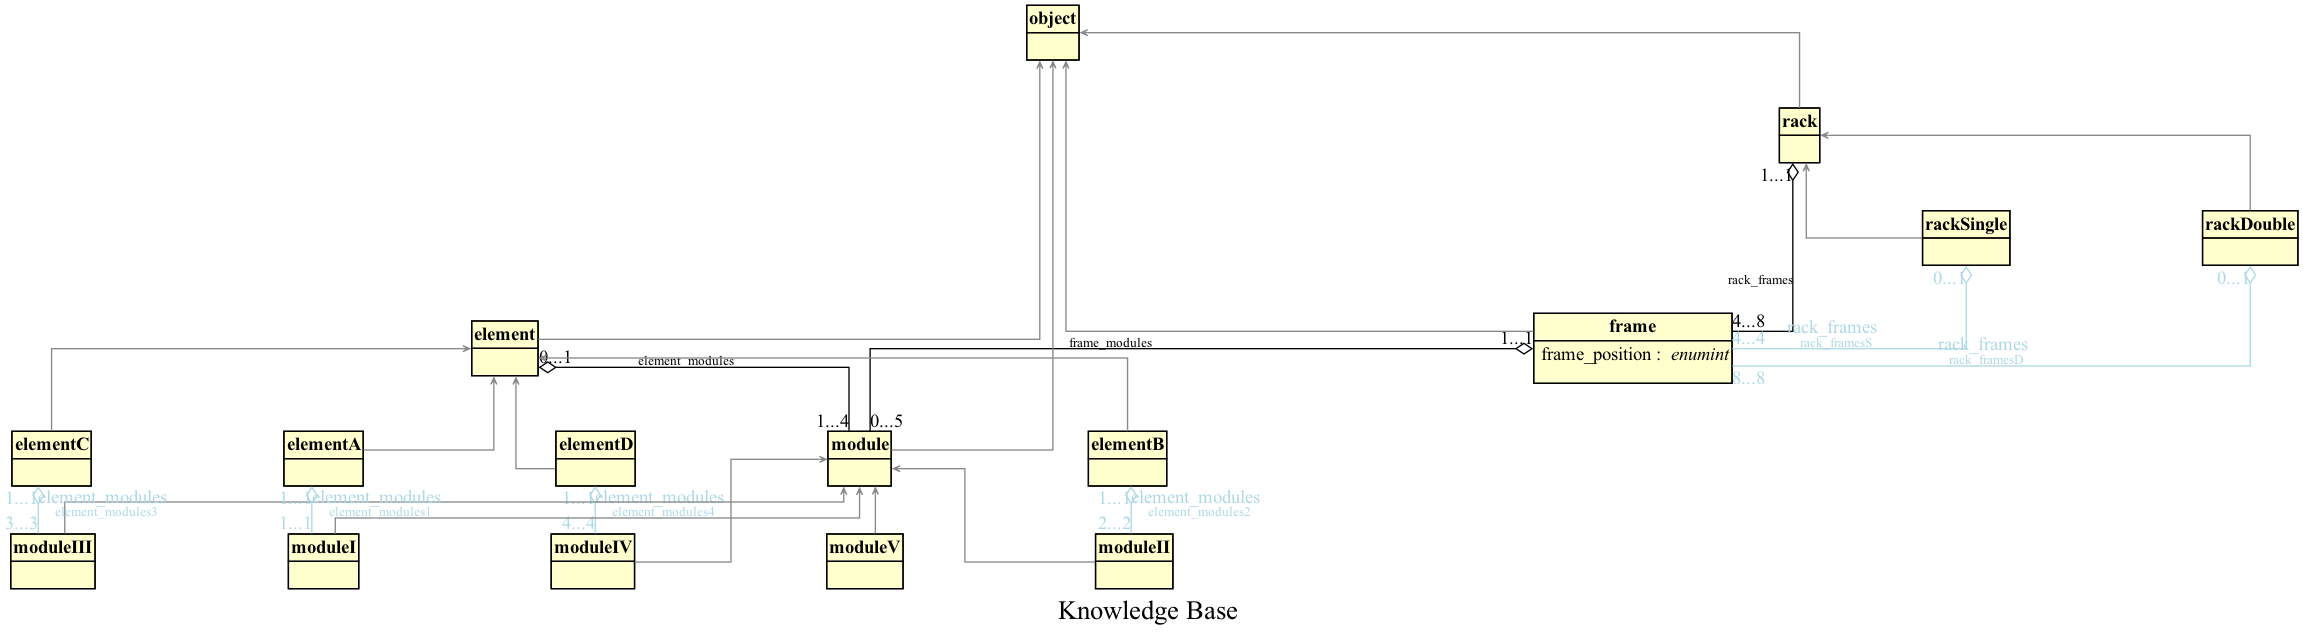

In [7]:
from IPython.display import Image
Image("examples/racks/racks_v1.png")

Query the factbase like a database

In [8]:
clorm_class = racks_kb.UNIFIERS.Class
clorm_subclass = racks_kb.UNIFIERS.SubClass
q = racks_kb.fb.query(clorm_class,clorm_subclass).join(clorm_class.name==clorm_subclass.sub_class)
q = q.where(clorm_subclass.super_class=="rack").select(clorm_class)

In [9]:
print(list(q.all()))

[ooasp_class(rackSingle), ooasp_class(rackDouble)]


In [10]:
print([c.name for c in q.all()])

['rackSingle', 'rackDouble']
